### K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Finding the optimum number of clusters for K-Means and determining the value of K.

In [8]:
x = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

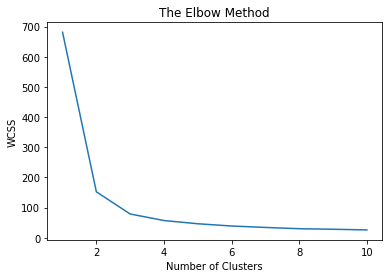

In [9]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##### The above diagram shows that this is clearly the 'The Elbow Method'.

#### From this we choose the number of clusters as **'3**'.

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

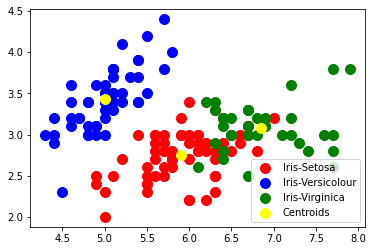

In [13]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label = 'Iris-Setosa')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='blue', label = 'Iris-Versicolour')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label = 'Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

#### K-Means Workshop ends here.